Imports

In [1]:
import numpy as np
from helpers import create_band_matrix,create_forcing_matrix,create_graph
from matrix_algorithms import solve_jacobi,solve_gauss_seidel,solve_l_u, OutputSolution,solve_jacobi_sparse_no_lib
import matplotlib.pyplot as plt
from app_types import Config
import os

In [2]:
# Glocal variables & config

OUTPUT_DOCS_PATH="../docs"

if not os.path.exists(OUTPUT_DOCS_PATH):
    os.makedirs(OUTPUT_DOCS_PATH)


Exercise A

Create a system of equations for a1=5+e, where e is the fourth digit of your index,
a2=a3=-1.The size of the matrix N is defined in section 2 of this manual. b is a vector
of length N, whose first element is the value of sin(n-(f+1)), where f is the third digit of your index.

In [3]:

index = 197839

thrid_digit = index // 1000 % 10 # 3rd digit of index
fourth_digit = index // 100 % 10 # 4th digit of index

before_last = index // 10 % 10 # before last digit of index
last_digit = index % 10 # last digit of index

a1 = 5 + fourth_digit# a1 = 5 + 4th digit of index
a2 = a3 = -1 

N = 1200 + 10 * before_last + last_digit

A = create_band_matrix(a1,a2,a3, N) 
b = create_forcing_matrix(N, thrid_digit + 1)

print(A)
print(b)


[[13 -1 -1 ...  0  0  0]
 [-1 13 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 13 -1 -1]
 [ 0  0  0 ... -1 13 -1]
 [ 0  0  0 ... -1 -1 13]]
[[ 0.98935825]
 [ 0.91794788]
 [ 0.3781055 ]
 ...
 [ 0.96749073]
 [-0.72202085]
 [-0.69618518]]


Exercise B

Implement iterative methods for solving systems of linear equations:
Jacobi and Gauss-Seidel. Describe how many iterations each method needs to determine the
solution of the system of equations from task A,assuming that the condition for completing the calculation
is to achieve a residuum norm of less than 10^-9.For both methods, show on the graph
how the norm of the residuum changes in successive iterations performed to determine the
solution(y-axis on a logarithmic scale).Compare the running times of both algorithms.

Jacobi iterations: 23, time: 32.12429356575012, residual norm: 5.310557403089412e-10
Gauss iterations: 16, time: 21.388206481933594, residual norm: 4.4838832454904943e-10


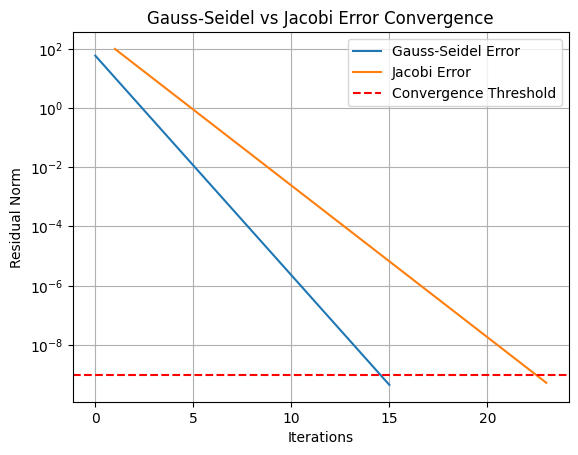

In [8]:
jacobi:OutputSolution = solve_jacobi(A, b)
print(f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}")

gauss:OutputSolution = solve_gauss_seidel(A, b)
print(f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}")

config = Config(
  x_label="Iterations",
  y_label="Residual Norm",
  title="Gauss-Seidel vs Jacobi Error Convergence",
  path=f"{OUTPUT_DOCS_PATH}/error_covergence.png",
  plot= [[gauss.errors,"Gauss-Seidel Error"], [jacobi.errors,"Jacobi Error"]],
  axhline=[[1e-9,"Convergence Threshold"]],
)
create_graph(config)

Exercise C

Define the system of equations for a1=3,  a_2 = a_3 = -1 and let  N be the vector that corresponds to the specification in the task for matrix A. Do the iterative methods converge for such values of the matrix elements A? For both methods, the plot shows how the residual norm changes in successive iterations (the Y-axis is in logarithmic scale).

Jacobi iterations: 59, time: 82.61633276939392, residual norm: 1088900175.8859255, coverage: No
Gauss iterations: 25, time: 32.18058753013611, residual norm: 1150466096.2214158, coverage: No


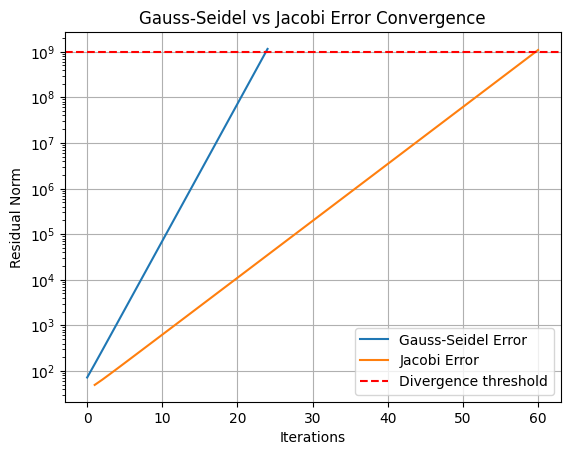

In [9]:
# change A matrix parameters
A = create_band_matrix(3,-1,-1, N) 


jacobi:OutputSolution = solve_jacobi(A, b)
print(f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}, coverage: {'Yes' if jacobi.does_converge else 'No'}")

gauss:OutputSolution = solve_gauss_seidel(A, b)
print(f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}, coverage: {'Yes' if gauss.does_converge else 'No'}")

config = Config(
  x_label="Iterations",
  y_label="Residual Norm",
  title="Gauss-Seidel vs Jacobi Error Convergence",
  path=f"{OUTPUT_DOCS_PATH}/error_covergence_alternative.png",
  plot= [[gauss.errors,"Gauss-Seidel Error"], [jacobi.errors,"Jacobi Error"]],
  axhline=[[1e9,"Divergence threshold"]],
)
create_graph(config)

Exercise D

Implement a direct method for solving systems of linear equations: the LU decomposition method. Use this implementation to find the solution to the equation from Task C. What is the value of the residual norm in this case?

In [10]:
A = create_band_matrix(3,-1,-1, N) 

l_u_solution: OutputSolution = solve_l_u(A, b)

print(f"Time: {l_u_solution.time}, residual norm: {l_u_solution.errors[-1]}")



Time: 444.38342928886414, residual norm: 8.897384100549733e-11


Exercise E

Create a plot showing the dependency of time taken to determine the solution for three given methods as a function of the number of unknowns 
N={100,500,1000,2000,3000} for the matrix described in task A. The plots should illustrate identical data, with the first plot having a linear scale on the Y-axis, and the second one having a logarithmic scale on the Y-axis

In [ ]:

Matrix_sizes = [100, 500,1000,1500, 2000]

jacobi_time = []
gauss_time = []
direct_method = []

for size in Matrix_sizes:
  A = create_band_matrix(a1,a2,a3, size) 
  b = create_forcing_matrix(size, thrid_digit + 1)
  
  jacobi:OutputSolution = solve_jacobi(A, b)
  gauss:OutputSolution = solve_gauss_seidel(A, b)
  l_u_solution: OutputSolution = solve_l_u(A, b)
  
  jacobi_time.append(jacobi.time)
  gauss_time.append(gauss.time)
  direct_method.append(l_u_solution.time)
  

plot_data = [[Matrix_sizes,gauss_time,"Gauss-Seidel Time"], [Matrix_sizes,jacobi_time,"Jacobi Time"], [Matrix_sizes,direct_method,"Direct Method Time"]]

configLog = Config(
  x_label="Matrix N",
  y_label="Time (s)",
  title="Comparision of diffrent methods that solves linear equations (log scale)",
  path=f"{OUTPUT_DOCS_PATH}/time_comparison_log.png",
  plot=plot_data,
  log_y_axis=True,
  has_x_axis=True,
)
create_graph(configLog)

configLinear = Config(
  x_label="Matrix N",
  y_label="Time (s)",
  title="Comparision of diffrent methods that solves linear equations (linear scale)",
  path=f"{OUTPUT_DOCS_PATH}/time_comparison_linear.png",
  plot=plot_data,
  log_y_axis=False,
  has_x_axis=True,
)
create_graph(configLinear)



KeyboardInterrupt: 